In [194]:
import matplotlib.pyplot as plt
from matplotlib import colormaps
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

In [195]:
# Load data and rename columns
poverty_data = pd.read_csv("../data/poverty-share-on-less-than-30-per-day.csv")
poverty_data.columns = ["Entity", "Code", "Year", "Percentage"]

In [196]:
w, h = 1000, 580

df = poverty_data[poverty_data["Year"] == 2015]

fig = px.choropleth(
    df,
    locations="Entity",
    locationmode="country names",
    color="Percentage",
    color_continuous_scale=px.colors.sequential.YlOrRd,
    title="Share of population living under the poverty line in 2015, sequential colormap",
    width=w,
    height=h,
    labels={"Entity": "Country"},
)
fig.show()

In [200]:
pr = df[["Percentage"]]
mu = 50.0
diff = pr - mu
norm_col = diff

df_normalized = df.copy()
df_normalized["Percentage"] = norm_col

In [202]:
fig = px.choropleth(
    df_normalized,
    locations="Entity",
    locationmode="country names",
    color="Percentage",
    title=f"Share of population living under the poverty line in 2015, diverging colormap",
    color_continuous_midpoint=0,
    color_continuous_scale=px.colors.diverging.RdYlBu_r,
    width=w,
    height=h,
    labels={"Entity": "Country", "Percentage": "Difference"},
    range_color=[-50, 50]
)
fig.show()

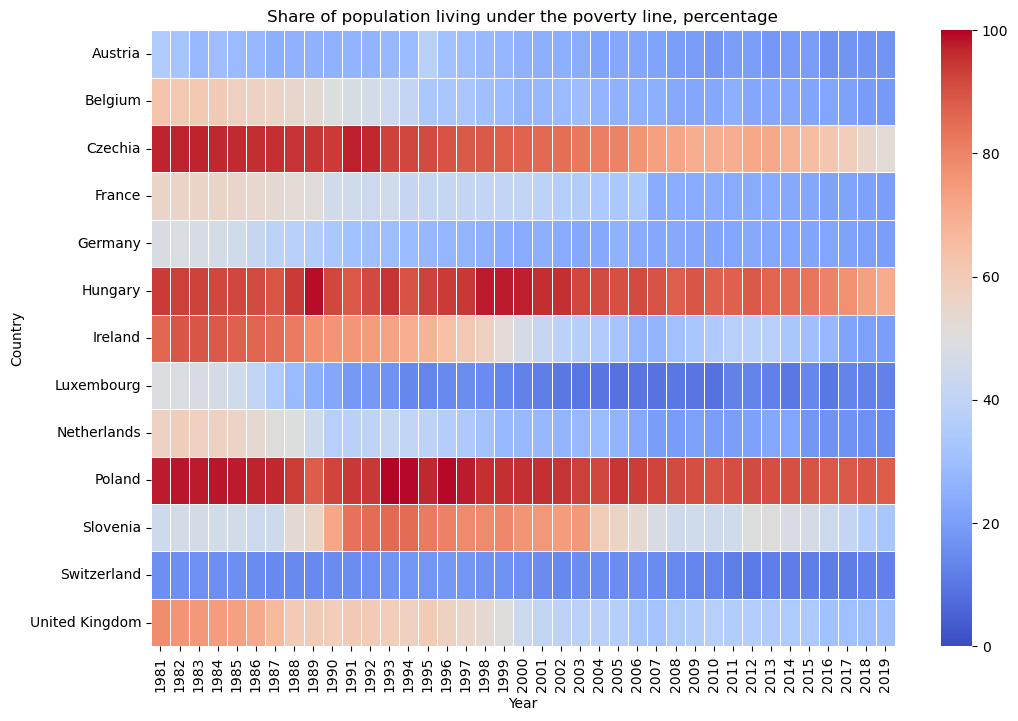

In [ ]:
ceurope = [
    "Austria",
    "Belgium",
    "Czechia",
    "France",
    "Germany",
    "Hungary",
    "Ireland",
    "Luxembourg",
    "Netherlands",
    "Poland",
    "Slovakia",
    "Slovenia",
    "Switzerland",
    "United Kingdom",
]

df = poverty_data[poverty_data["Entity"].isin(ceurope)]
df = pd.pivot(df, index="Entity", columns="Year", values="Percentage")
df = df.dropna()

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df, vmax=100, vmin=0, cmap="coolwarm", ax=ax, linewidths=0.5)
plt.xlabel("Year")
plt.ylabel("Country")
plt.title("Share of population living under the poverty line, percentage")

plt.show()

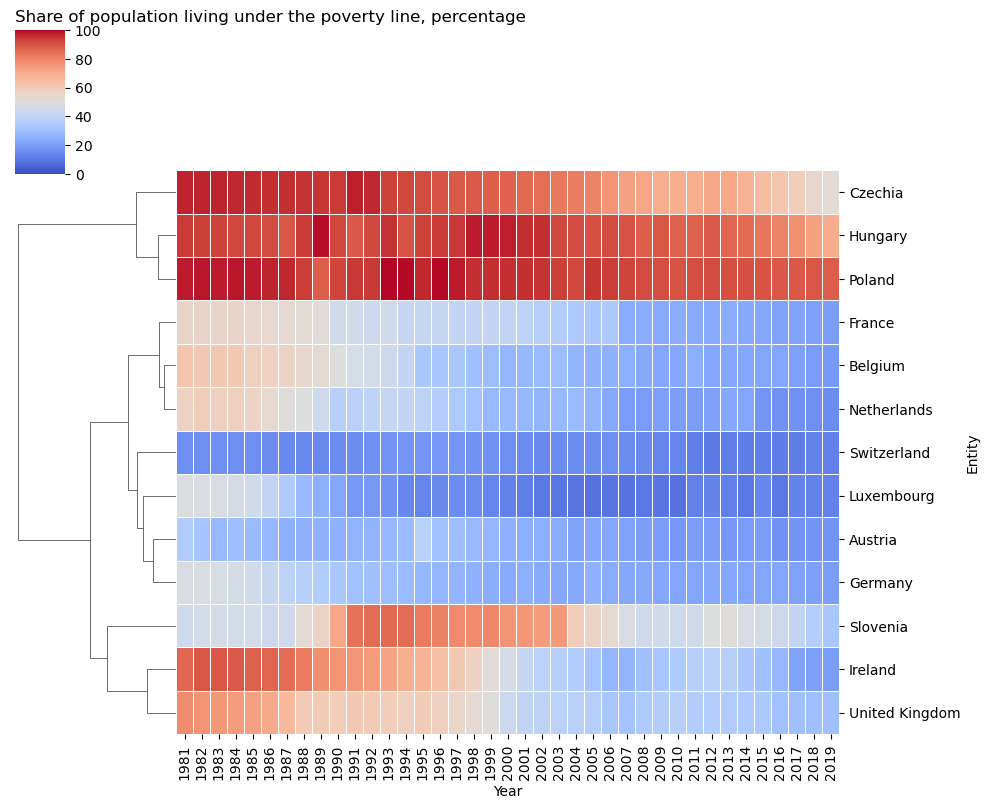

In [ ]:
sns.clustermap(df, cmap='coolwarm', linewidths=0.5, figsize=(10, 8), vmin=0, vmax=100, col_cluster=False)
plt.title("Share of population living under the poverty line, percentage", loc="left")
plt.show()
